# Kotani & Hughes 2017

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from kotani2017 import data; k17 = data()

pd.set_option('display.max_colwidth', -1)

In [2]:
def sema(vect, fig):
    #semantics=', '.join('{}={}'.format(x,y) for (x,y) in fig.pepperargs['default'].items() if x != 'conc')
    nv = []
    for line in vect:
        v = []
        for (x,y) in fig.pepperargs[line].items():
            if x == 'conc': continue
            if x == 'max_complex_size': continue
            if x == 'max_complex_count': continue
            if x == 'max_reaction_count': continue
            if x == 'condensed': 
                z = x if y is True else 'detailed'
            else:
                z = '{}={}'.format(x,y)
            v.append(z)
        nv.append(', '.join(v))
    return nv

verb = 0
Table1 = DataFrame()
for fig in k17:
    print(fig.name)
    if fig.name != 'Kotani & Hughes (2017) Fig. 4 - Autocatalytic DSD system with 4-way branch migration (varying autocatalyst)': continue
    fig.pepperargs['#1-detailed'] = {'condensed': False, 'conc': 'nM', 'release_cutoff': 8, 'max_complex_size': 10}
    fig.pepperargs['#1-condensed'] = {'condensed': True, 'conc': 'nM', 'release_cutoff': 8, 'max_complex_size': 10}
    fig.pepperargs['#2-condensed'] = {'condensed': True, 'conc': 'nM', 'k_slow': 1e-3, 'max_complex_size': 20} # doesn't work, no 4-way branch migration, no D
    fig.pepperargs['#3-detailed']  = {'condensed': False, 'conc': 'nM', 'k_slow': 1e-4, 'max_complex_size': 10} # works! but not as good as detailed...
    fig.pepperargs['#3-condensed'] = {'condensed': True, 'conc': 'nM', 'k_slow': 1e-4, 'max_complex_size': 10} # works! but not as good as detailed...
    fig.pepperargs['#4-detailed'] = {'condensed': False, 'conc': 'nM', 'k_slow': 1e-4, 'k_fast': 1e-3, 'max_complex_size': 16, 'max_complex_count': 10000, 'max_reaction_count': 10000}
    fig.pepperargs['#4-condensed'] = {'condensed': True, 'conc': 'nM', 'k_slow': 1e-4, 'k_fast': 1e-3, 'max_complex_size': 16, 'max_complex_count': 10000, 'max_reaction_count': 10000}
    fig.pepperargs['#5-detailed'] = {'condensed': True, 'conc': 'nM', 'k_slow': 1e-4, 'k_fast': 1e-2, 'max_complex_size': 24, 'max_complex_count': 10000, 'max_reaction_count': 10000} # solver cannot handle leak
    fig.pepperargs['#5-condensed'] = {'condensed': True, 'conc': 'nM', 'k_slow': 1e-4, 'k_fast': 1e-2, 'max_complex_size': 24, 'max_complex_count': 10000, 'max_reaction_count': 10000} # solver cannot handle leak
    fig.pepperargs['#6-detailed'] = {'condensed': True, 'conc': 'nM', 'k_slow': 1e-5, 'k_fast': 1e-2, 'max_complex_size': 24, 'max_complex_count': 10000, 'max_reaction_count': 10000}
    fig.pepperargs['#6-condensed'] = {'condensed': True, 'conc': 'nM', 'k_slow': 1e-5, 'k_fast': 1e-2, 'max_complex_size': 24, 'max_complex_count': 10000, 'max_reaction_count': 10000}
    fig.pepperargs['#7-detailed'] = {'condensed': False, 'conc': 'nM', 'k_slow': 1e-10, 'k_fast': 1e-2, 'max_complex_size': 24, 'max_complex_count': 10000, 'max_reaction_count': 10000}
    fig.pepperargs['#7-condensed'] = {'condensed': True, 'conc': 'nM', 'k_slow': 1e-10, 'k_fast': 1e-2, 'max_complex_size': 24, 'max_complex_count': 10000, 'max_reaction_count': 10000}
    fig.eval('#1-detailed', verbose = verb, cmpfig=True)
    fig.eval('#1-condensed', verbose = verb, cmpfig=True)
    fig.eval('#3-detailed', verbose = verb, cmpfig=True)
    fig.eval('#3-condensed', verbose = verb, cmpfig=True)
    fig.eval('#4-detailed', verbose = verb, cmpfig=True)
    fig.eval('#4-condensed', verbose = verb, cmpfig=True)
    fig.eval('#5-detailed', verbose = verb, cmpfig=True)
    fig.eval('#5-condensed', verbose = verb, cmpfig=True)
    fig.eval('#6-detailed', verbose = verb, cmpfig=True)
    fig.eval('#6-condensed', verbose = verb, cmpfig=True)
    #fig.eval('#7-detailed', verbose = verb, cmpfig=True)
    #fig.eval('#7-condensed', verbose = verb, cmpfig=True)
    

    for df in fig.get_system_dataframes():
        df['Name'] = fig.name
        df['condensed'] = 'condensed' if any(map(lambda x: 'condensed' in x, df['Semantics'])) else 'detailed'
        df['pargs'] = list(map(lambda x: x[:2], df['Semantics']))
        df['Semantics']=sema(df['Semantics'], fig)
        #df.to_latex(fig.fname+'.tex', index=False, float_format='{:.3f}'.format)
        #display(df)
        Table1 = Table1.append(df)

Kotani & Hughes (2017) Fig. 2 - Single-layer catalytic DSD with 4-way branch migration (varying catalyst)
Kotani & Hughes (2017) Fig. 3 - Two-layer feedforward DSD system with 4-way branch migration (varying catalyst)
Kotani & Hughes (2017) Fig. 4 - Autocatalytic DSD system with 4-way branch migration (varying autocatalyst)


# Plotting Data

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

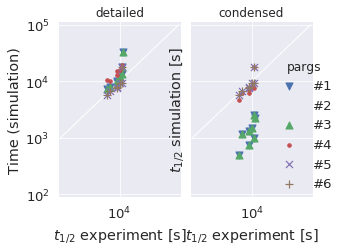

In [4]:
# Compare different enumeration parameters for Figure 4 (autocatalytic system)
Table1.to_latex('Kotani2017data.tex', index=False, float_format='{:.0f}'.format)


tmpfig = Table1.copy()
tmpfig = tmpfig.loc[tmpfig['Name'].isin(['Kotani & Hughes (2017) Fig. 4 - Autocatalytic DSD system with 4-way branch migration (varying autocatalyst)'])]
#display(tmpfig)

with sns.plotting_context('paper', font_scale = 1.5):
    g = sns.lmplot(x="Time (experiment)", 
               y="Time (simulation)", 
               hue="pargs", col='condensed', data=tmpfig, scatter_kws={"s": 50, "alpha": 1},
               fit_reg=False, hue_order=['#1', '#2', '#3', '#4', '#5', '#6'], markers=['v', 'x', '^', '.','x','+'])
    
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.gcf().set_size_inches(4.5,3.2)

plt.xscale('log')
plt.yscale('log')
(mi, ma)=(1e3, 1e5)
plt.xlim(0.9e3, 1.1e5)
plt.ylim(0.9e2, 1.1e5)
for ax in plt.gcf().get_axes():
    ax.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)
    ax.set(xlabel='$t_{1/2}$ experiment [s]')
plt.gca().set(ylabel='$t_{1/2}$ simulation [s]')

plt.savefig('kotani2017_F4_params.pdf', bbox_inches='tight')
plt.savefig('kotani2017_F4_params.svg', bbox_inches='tight')

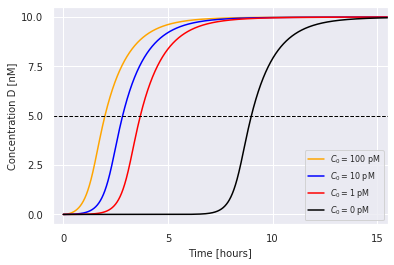

In [5]:
# Compare reporter trajectory for different initial conditions.

# Get Data from File
[F2, F3, F4] = k17

nxy = np.loadtxt(F4.cmpfig['#1-detailed'], skiprows=1)
legend = ['$C_0 = 100$ pM', '$C_0 = 10$ pM', '$C_0 = 1$ pM', '$C_0 = 0$ pM']
time = nxy[:,0] / 3600
ys = nxy[:,1:]

plt.gca().set_prop_cycle(color=['orange','blue', 'red', 'black'])
#plt.figure(figsize=(3.5,2.5))
plt.plot(time, ys)

plt.xlim(-0.5,15.5)
plt.xticks(np.arange(0, 16, step=5), fontsize=10)
plt.ylim(-0.5,10.5)
plt.yticks(np.arange(0, 11, step=2.5), fontsize=10)

plt.legend(legend, ncol=1, fontsize=8);
plt.gca().set_xlabel('Time [hours]', fontsize=10)
plt.gca().set_ylabel('Concentration D [nM]', fontsize=10)
plt.gca().axhline(y=5, linewidth=1, color='black', linestyle='--')

#plt.savefig('sim_kotani17.pdf', bbox_inches='tight')
#plt.savefig('sim_kotani17.svg', bbox_inches='tight')